# Import modules

In [2]:
#from google.colab import drive
#drive.mount("/content/drive")

In [2]:
# Importing required libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

# Loading the dataset

In [3]:
# Loading dataset

df = pd.read_csv(r'E:\Bigmart\Train.csv')
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
# Basic mathematical calculations on Numerical data present in our data

df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [6]:
# Complete explaination of dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [7]:
# Finding unique values in our dataset

df.apply(lambda x: len(x.unique()))

Item_Identifier              1559
Item_Weight                   416
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     4
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [8]:
# Finding number of null values in each column

df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [9]:
# Selecting columns with categorical data in them

cat_col = []
for x in df.dtypes.index:
    if df.dtypes[x] == 'object':
        cat_col.append(x)
cat_col

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [10]:
# Removing columns not useful to us

cat_col.remove('Item_Identifier')
cat_col.remove('Outlet_Identifier')
cat_col

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [11]:
# Representation of data present inside categorical columns

for col in cat_col:
    print("Column Name:- ", col)
    print("Values:-")
    print(df[col].value_counts())
    print()

Column Name:-  Item_Fat_Content
Values:-
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

Column Name:-  Item_Type
Values:-
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

Column Name:-  Outlet_Size
Values:-
Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

Column Name:-  Outlet_Location_Type
Values:-
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

Column Name:-  Outlet_Type
Values:-
Supermarket Ty

In [12]:
# pivot table is used to group by
# In our case we grouped item weight on the basis of item identifier
# item_weight_mean stores mean of weight of every unique item code from item identifier

item_weight_mean = df.pivot_table(values = "Item_Weight", index = 'Item_Identifier')
item_weight_mean

,Item_Weight
Item_Identifier,
DRA12,11.600
DRA24,19.350
DRA59,8.270
DRB01,7.390
DRB13,6.115
...,...
NCZ30,6.590
NCZ41,19.850
NCZ42,10.500


In [14]:
# Total null values in item_weight column

df['Item_Weight'].isnull().sum()

1463

In [15]:
# Boolean representation of weight column

miss_bool = df['Item_Weight'].isnull()
miss_bool

0       False
1       False
2       False
3       False
4       False
        ...  
8518    False
8519    False
8520    False
8521    False
8522    False
Name: Item_Weight, Length: 8523, dtype: bool

In [16]:
# In weight column the mean values calculated above is placed in place of null values
# enumerate is used when counting or index is also required
# i stores index/count, item stores item code from item identifier
# item_weight_mean.loc[item]['Item_Weight'] it means inside item_weight_mean
# row in which item is present, weight is selected from the same row

for i, item in enumerate(df['Item_Identifier']):
    if miss_bool[i]:
        if item in item_weight_mean.index:
            df['Item_Weight'][i] = item_weight_mean.loc[item]['Item_Weight']
        else:
          print(i)

927
1922
4187
5022


In [17]:
# Now, no null value present in weight column

df = df.drop([927,1922,4187,5022], axis=0)
df['Item_Weight'].isnull().sum()

0

In [18]:
# Grouping outlet size on the basis of outlet type
# After grouping, mode value of outlet size from each outlet type is stored

outlet_size_mode = df.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=(lambda x: x.mode()[0]))
outlet_size_mode

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [19]:
# Boolean representation of outlet size column

miss_bool = df['Outlet_Size'].isnull()
miss_bool

0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519     True
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8519, dtype: bool

In [20]:
# loc[miss_bool, 'Outlet_Size'] selects outlet size when miss_bool is true
# after selecting space where data is to be filled, df.loc[miss_bool, 'Outlet_Type'] selects the outlet_type from the same row
# and based on the type, apply(lambda x: outlet_size_mode[x]) fills mode value of that outlet type in our null place in outlet size column

df.loc[miss_bool, 'Outlet_Size'] = df.loc[miss_bool, 'Outlet_Type'].apply(lambda x: outlet_size_mode[x])

In [21]:
# Now, no null value present in size column

df['Outlet_Size'].isnull().sum()

0

In [22]:
# Checking items with no visiblity

sum(df['Item_Visibility']==0)

526

In [23]:
# Replacing 0 with mean visibility

df.loc[:, 'Item_Visibility'].replace([0], [df['Item_Visibility'].mean()], inplace=True)

In [24]:
# Now, no 0 visibility object in visibility column

sum(df['Item_Visibility']==0)

0

In [25]:
# Combining item fat content

df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'LF':'Low Fat', 'reg':'Regular', 'low fat':'Low Fat'})
df['Item_Fat_Content'].value_counts()

Low Fat    5516
Regular    3003
Name: Item_Fat_Content, dtype: int64

In [26]:
# Adding a new column with only 1st 2 characters of item identifier

df['New_Item_Type'] = df['Item_Identifier'].apply(lambda x: x[:2])
df['New_Item_Type']

0       FD
1       DR
2       FD
3       FD
4       NC
        ..
8518    FD
8519    FD
8520    NC
8521    FD
8522    DR
Name: New_Item_Type, Length: 8519, dtype: object

In [27]:
# Changing FD, NC and DR to food, non-consumable and drinks resp.

df['New_Item_Type'] = df['New_Item_Type'].map({'FD':'Food', 'NC':'Non-Consumable', 'DR':'Drinks'})
df['New_Item_Type'].value_counts()

Food              6121
Non-Consumable    1599
Drinks             799
Name: New_Item_Type, dtype: int64

In [28]:
# Selecting row where type is non-consumable
# on that row selecting fat_contenct column and putting Non-edible 

df.loc[df['New_Item_Type']=='Non-Consumable', 'Item_Fat_Content'] = 'Non-Edible'
df['Item_Fat_Content'].value_counts()

Low Fat       3917
Regular       3003
Non-Edible    1599
Name: Item_Fat_Content, dtype: int64

In [29]:
# Data was collected in 2013

df['Outlet_Years'] = 2013 - df['Outlet_Establishment_Year']

In [30]:
# Year values decreased

df['Outlet_Years']

0       14
1        4
2       14
3       15
4       26
        ..
8518    26
8519    11
8520     9
8521     4
8522    16
Name: Outlet_Years, Length: 8519, dtype: int64

In [31]:
# Data cleaned successfully

df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_Item_Type,Outlet_Years
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,Food,14
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,Drinks,4
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,Food,14
3,FDX07,19.20,Regular,0.066112,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,Food,15
4,NCD19,8.93,Non-Edible,0.066112,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,Non-Consumable,26


In [34]:
df.to_csv('file1.csv')

##Data Visualization

<AxesSubplot:xlabel='Item_Weight', ylabel='Density'>

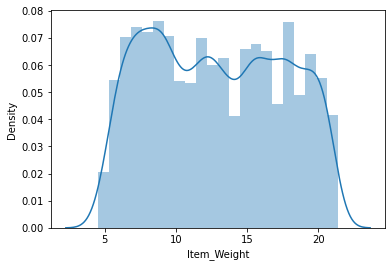

In [117]:
sns.distplot(df['Item_Weight'])

<AxesSubplot:xlabel='Item_Visibility', ylabel='Density'>

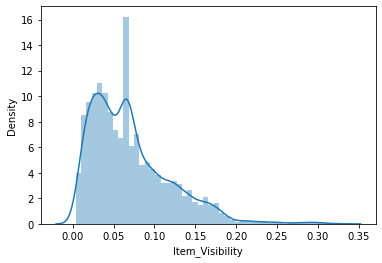

In [33]:
sns.distplot(df['Item_Visibility'])

<AxesSubplot:xlabel='Item_MRP', ylabel='Density'>

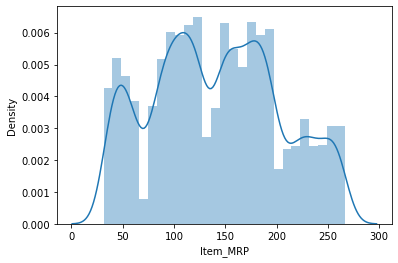

In [34]:
sns.distplot(df['Item_MRP'])

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

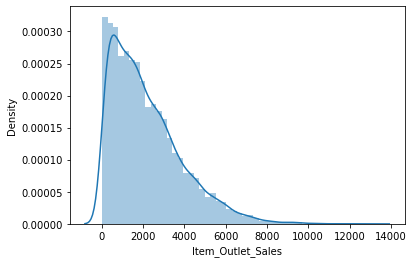

In [35]:
sns.distplot(df['Item_Outlet_Sales'])

In [118]:
# Sales ranges from 0 to 14000, thus to reduce this range

df['Item_Outlet_Sales'] = np.log(1+df['Item_Outlet_Sales'])

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

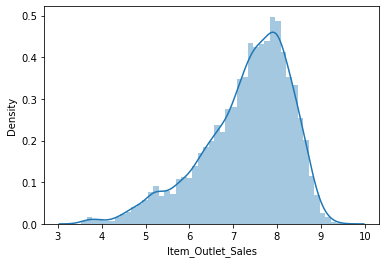

In [119]:
sns.distplot(df['Item_Outlet_Sales'])

# Coorelation Matrix

In [120]:
# Coorelation Matrix

corr = df.corr()
corr

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet_Years
Item_Weight,1.000000,-0.017483,0.025975,-0.013426,0.007677,0.013426
Item_Visibility,-0.017483,1.000000,-0.005115,-0.077878,-0.201895,0.077878
Item_MRP,0.025975,-0.005115,1.000000,0.004599,0.510213,-0.004599
Outlet_Establishment_Year,-0.013426,-0.077878,0.004599,1.000000,0.077024,-1.000000
Item_Outlet_Sales,0.007677,-0.201895,0.510213,0.077024,1.000000,-0.077024
Outlet_Years,0.013426,0.077878,-0.004599,-1.000000,-0.077024,1.000000


<AxesSubplot:>

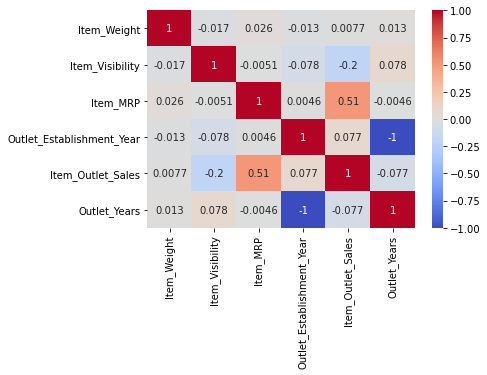

In [121]:
# Heat Map

sns.heatmap(corr, annot=True, cmap='coolwarm')

In [122]:
df.head()


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_Item_Type,Outlet_Years
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,8.225808,Food,14
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,6.096776,Drinks,4
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,7.648868,Food,14
3,FDX07,19.20,Regular,0.066112,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,6.597664,Food,15
4,NCD19,8.93,Non-Edible,0.066112,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,6.903451,Non-Consumable,26


# Label Encoding


In [126]:
# LabelEncoder encodes our categorical data into numbers
# Here we created another column 'Outlet' which stores encoded values of Outlet_Identifier

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Outlet'] = le.fit_transform(df['Outlet_Identifier'])
cat_col = ['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'New_Item_Type']
for col in cat_col:
    df[col] = le.fit_transform(df[col])

df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_Item_Type,Outlet_Years,Outlet
0,FDA15,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,8.225808,1,14,9
1,DRC01,5.92,2,0.019278,14,48.2692,3,2009,1,2,2,6.096776,0,4,3
2,FDN15,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,7.648868,1,14,9
3,FDX07,19.20,2,0.066112,6,182.0950,0,1998,2,2,0,6.597664,1,15,0
4,NCD19,8.93,1,0.066112,9,53.8614,1,1987,0,2,1,6.903451,2,26,1


# Onehot Encoding

In [127]:
# OneHot Encoding is same as labelencoder the difference is that in onehot it creates column of eact type
# Item type is not included in this because then there will be way too many columns

df = pd.get_dummies(df, columns=['Item_Fat_Content', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'New_Item_Type'])
df.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet_Years,Outlet,...,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3,New_Item_Type_0,New_Item_Type_1,New_Item_Type_2
0,FDA15,9.30,0.016047,4,249.8092,9,1999,8.225808,14,9,...,1,0,0,0,1,0,0,0,1,0
1,DRC01,5.92,0.019278,14,48.2692,3,2009,6.096776,4,3,...,0,0,1,0,0,1,0,1,0,0
2,FDN15,17.50,0.016760,10,141.6180,9,1999,7.648868,14,9,...,1,0,0,0,1,0,0,0,1,0
3,FDX07,19.20,0.066112,6,182.0950,0,1998,6.597664,15,0,...,0,0,1,1,0,0,0,0,1,0
4,NCD19,8.93,0.066112,9,53.8614,1,1987,6.903451,26,1,...,0,0,1,0,1,0,0,0,0,1


# Input Split

In [128]:
X = df.drop(columns=['Outlet_Establishment_Year', 'Item_Identifier', 'Outlet_Identifier', 'Item_Outlet_Sales'])
y = df['Item_Outlet_Sales']

In [129]:
# Attributes

X

,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Years,Outlet,Item_Fat_Content_0,Item_Fat_Content_1,Item_Fat_Content_2,Outlet_Size_0,...,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3,New_Item_Type_0,New_Item_Type_1,New_Item_Type_2
0,9.300,0.016047,4,249.8092,14,9,1,0,0,0,...,1,0,0,0,1,0,0,0,1,0
1,5.920,0.019278,14,48.2692,4,3,0,0,1,0,...,0,0,1,0,0,1,0,1,0,0
2,17.500,0.016760,10,141.6180,14,9,1,0,0,0,...,1,0,0,0,1,0,0,0,1,0
3,19.200,0.066112,6,182.0950,15,0,0,0,1,0,...,0,0,1,1,0,0,0,0,1,0
4,8.930,0.066112,9,53.8614,26,1,0,1,0,1,...,0,0,1,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0.056783,13,214.5218,26,1,1,0,0,1,...,0,0,1,0,1,0,0,0,1,0
8519,8.380,0.046982,0,108.1570,11,7,0,0,1,0,...,0,1,0,0,1,0,0,0,1,0
8520,10.600,0.035186,8,85.1224,9,6,0,1,0,0,...,0,1,0,0,1,0,0,0,0,1
8521,7.210,0.145221,13,103.1332,4,3,0,0,1,0,...,0,0,1,0,0,1,0,0,1,0


In [130]:
# Label

y

0       8.225808
1       6.096776
2       7.648868
3       6.597664
4       6.903451
          ...   
8518    7.929984
8519    6.310436
8520    7.085159
8521    7.521100
8522    6.642056
Name: Item_Outlet_Sales, Length: 8519, dtype: float64

In [131]:
# Spliting training and testing data

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.1,random_state=0)

# Model Training

In [132]:
from sklearn.linear_model import LinearRegression  
LR = LinearRegression()
LR.fit(X_train, y_train)

LinearRegression()

In [133]:
prediction = LR.predict(X_test)

In [134]:
from sklearn.metrics import r2_score, mean_squared_error
print("Accuracy :- ", r2_score(y_test, prediction))
print("Mean Squared Error :- ", mean_squared_error(y_test,prediction))

Accuracy :-  0.7229183840349274
Mean Squared Error :-  0.2823700305010078


In [135]:
from sklearn.preprocessing import PolynomialFeatures
polynom=PolynomialFeatures(degree=5)
x_poly=polynom.fit_transform(X)
lr=LinearRegression()
lr.fit(x_poly,y)

LinearRegression()

In [136]:
y_pred_lr=lr.predict(x_poly)

In [137]:
print("Accuracy :- ", r2_score(y,y_pred_lr))
print("Mean Squared Error :- ", mean_squared_error(y,y_pred_lr))

Accuracy :-  0.7907674433905284
Mean Squared Error :-  0.21552160760807462
